<a href="https://colab.research.google.com/github/juyoung524/22-1-Spring-/blob/main/20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**이번 시간에 배우는 것 기말 기험에 많이 나오니까 잘 봐두기**

시간상에 있는 신호 (어떻게 높고, 낮고)도 중요하지만 주파수도 중요함

낮은음이 많은지, 높은음이 많은지, 얼마나 체계적으로 많은지 설명해 주는 것이 'spectrum'임.

입체적으로 알려주는 것이 바로 '스펙트럼'

여러 가지 다양하게 볼 수 있는 것 (웹사이트 들어가 보기)

**Y축이 주파수임**. 어디가 성분이 얼마나 많은지에 따라 모음도 구분됨

웹사이트 들어가서 손가락 버튼 누르면 중간쯤에 있는 sine 곡선이 만들어짐. 올리면 위쪽에 있는 sine 곡선이 만들어짐. **X축 시간 & Y축 주파수**

아래쪽으로 하면 낮은 쪽의 사인곡선이 만들어지고, 아래쪽으로 (낮은 음) 할 수도 있음.

보통 우리가 주변에서 일상적으로 들리는 소리는 하나의 sine 곡선으로 되지 않음. (안녕하세요만 해도 여러 가지 성분이 합쳐져서 낮은 데, 높은 데 다 소리가 존재하게 됨) 악기를 play해도 마찬가지임. 휘파람은 비교적 하나의 sine 곡선과 비슷하게 표현됨

우리가 어떤 음을 정확하게 내는 것 같지만, 사실 그것과 공명하는 다른 음들도 표현하고 있는 것임

드럼 소리 play해 보면 낮은 쪽에서 주로 놀고, '츠츠츠' 하는 심벌 소리 나올 때만 위쪽에도 등장함. 

이런 식으로 주파수 분석해야 확실히 알 수 있음. 전반적으로 '새' 소리는 높은 주파수로 잡힘



# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용)
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?
* **spectrogram은 spectrum을 time 축으로 concatenate한 것**
* 방법: signal (inner product) a series of complex phasors with different frequencies
* **inner product는 일종의 correlation** (즉, 해당 frequency가 얼마나 있는지 probing)
* 왜? sine phasor 안 쓰나? phase sensitivity 때문

complex phasor 썼기 때문에 a+bi 형태로 나오게 됨. abs(a+bi)

### Filter (변환용)
이제 실제로 신호에 대해 변환을 주는 것임 (실제로 바꾸는 용도)
* A --> function -->  B
* signal A --> filter --> signal B
* 신호 (time function)를 입력으로 하는 함수를 filter라고 함 (**X축이 time인 것을 time function이라고 부름**)

* 왜? filter 라고 부름? (**대부분 변형을 가할 때 함수라고 부름**) 이 함수의 목적이 **특정 주파수에 대한 manipulation**이므로.
(예: **어떤 주파수대를 작게, 크게, 통과, 제거 등**)

ex) 100Hz~500Hz까지의 낮은 주파수를 좀 빼라!

아니면 고주파의 높은 주파수 부분을 좀 빼라!

* 방법: **weighted sum of signal's shifts** (두가지 방법: FIR, IIR)

  * FIR: Y(k) = b<sub>1</sub>X(k) + b<sub>2</sub>X(k-1) + ... 
    - Y = H * X
  * IIR: a<sub>1</sub>Y(k) + a<sub>2</sub>Y(k-1) + ... = X(k)
    - Y = (1/H) * X

### Auto correlation
* measuring pitch / F0

### RMS: root mean square
* measuring intensity

**0428 수업**

Praat 보면 'pitch'값이 나옴 (아에이오우 할 때 '이'에서 목소리가 특히 높아짐)

praat 확대해봤을 때 반복되는 구간: 각 구간의 길이를 재 보면 0.007초, 1초에 140번 정도 등장함 (1초에 140번 떨리는 것임)

137HZ가 그 소리의 주파수임

Auto correlation이란 무엇인가?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

컴퓨터에 어떤 파일이 있는데, 그거 불러오고 싶으면 아래와 같이 하면 됨 (실행하면 'Choose Files'라는 게 뜨고, 그거 누르면 우리 컴퓨터에 있는 파일 업로드 가능)

In [2]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')

Librosa 이용해서 전 라이브러리 파일에 있는 것 불러오기

그것의 's' (signal) 48600개의 길이의 벡터 (1차원)

sampling rate: 22050 (1초에 22050개의 숫자가 있는 걸로 이해해라)

-> 2.몇 초 정도의 길이가 될 것임 (아에이오우 하는 길이 정도)

S와 Sampling Rate의 신호와 sampling rate를 받음

Normalize해준 것 (밑에 실행)

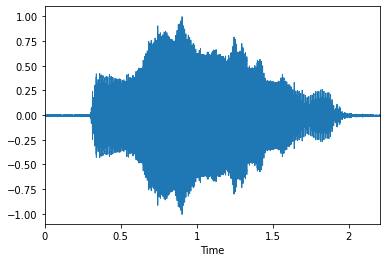

In [3]:
s = librosa.util.normalize(s)
librosa.display.waveplot(s, sr)
ipd.Audio(s[7000:12000], rate=sr)

librosa의 'normalize' 기능, 'waveplot' 기능

**x축을 시간축으로 해서 예쁘게 plotting**해 줌

잘 보시면 가장 세로 끝과 끝에 있는 것이 -1과 1 사이에 자리잡고 있음. 근데 원래 signal은 그렇지 않음. **Normalize해준다는 것은 -1과 1 사이에 signal을 예쁘게 scale up or down을 해준다는 말**임

다시 한 번 실행해서 normalize 없이 해 보면, -0.4, 0.4 사이로 들어옴. 근데 우리가 normalize하면 내부적으로 이 전체의 숫자값들의 **절댓값의 최댓값**이 있을 텐데, 그걸 가지고 **모든 숫자를 다 나누기**해줄 수 있음. (ex. 여기 절댓값의 최댓값이 0.4다? 그럼 모든 숫자를 다 0.4로 나눔. 그러면 최고점, 최저점의 숫자가 1과 -1이 되도록 해줄 수 있는 것임)

librosa package에 있는 기능으로 예쁘게 만들어 줄 수 있는 것임

**ipd라고 해서 불러오면 sound 들어볼 수 있게** 함. 

근데 여기서 **7000번에서 12000번**으로만 선택하면 대략적으로 **'아' 모음만** 나옴.

그래서 '아' 모음을 가지고 spectrogram 만들어 보기

given signal이 '아'라는 signal이 되는 것임. 우리가 원하는 다양한 frequency들의 phasor 만들고, 그것들을 inner product에서 따오는 것이 spectrum임.

### Fourier Transform for Spectrogram

(0.0, 5000.0)

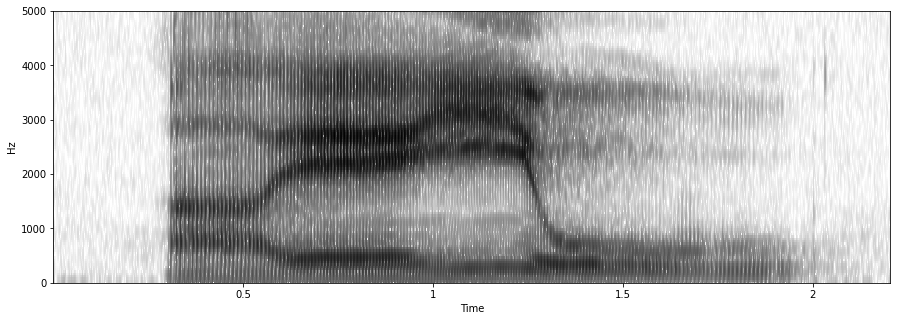

In [4]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512
hop_length=int(0.001*sr)
win_length=int(sr*0.008)

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')
magspec = np.abs(spec)
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))

복소수 -> 실수, 실수가 나오면 그걸 다시 decibel로 바꿔줌 (청각적으로 느끼는 것으로 스케일을 다시 바꿔준다!)

시험문제 Example

Window가 0.008초짜리가 조금씩 조금씩 이동해서 0.001만큼 이동해서 계속 나간다고 쳐보자. (한 장의 스펙트럼) **이 스펙트럼이 여러 장 쌓여서 우리가 보는 'spectrogram'이 됨**.

우리가 얘기한 '한 장의 스펙트럼'은 회색의 그림에서 과연 뭘까?

입체로 생각해 보기. 이 그림에서는 입체로 나타내기 어렵기 때문에 **까만 부분이 우리 눈 쪽으로 솟아있고, 흰 부분이 꺼져 있다**고 생각하면 됨.

spectrogram에서는 y축이 frequency임

### Filter for audio transformation

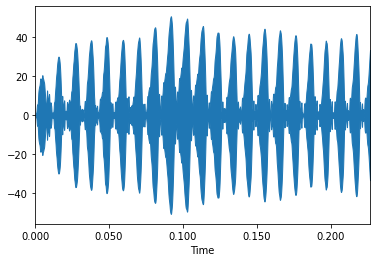

In [7]:
from scipy.signal import lfilter
sig = s[7000:12000] #얘가 given signal임 ('아' 부분)
sig = lfilter(np.array([1/2, 1/2, 1/2, 1/2]), np.array([1/2, -1/2]), sig, axis=0) #filter해주는 function
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

Given signal: 7000부터 12000까지 ('아' 부분만 해당)- sig라고 받음

scipy.signal에 있는 lfilter

앞에 있는 것이 B, 뒤에 있는 게 A값임. array로 만들어줘야 함 (숫자들이니까 list로 해서 array로 변환)

**a, b에 둘 다 1 넣어주면 원래 소리에서 하나도 바뀌는 게 없음**.

1/2을 마구 넣어주면 조금 부드러운 소리로 바뀌는 것임 (먹먹하게 먹히는 소리로)

앞부분 (1/2 엄청 많이 들어가 있는 부분)이 FIR 필터, 뒷부분이 IIR 필터 (a 부분) 부분임.

계수값만 넣어주면 소리 저렇게 바꿀 수 있다

Signal 바꿔주는 Filter에 FIR, IRR filter가 있다. 계수값 바꿔주면 소리가 바뀐다.

### RMS(Root Mean Square) for intensity

RMS는 '평균제곱근'을 의미하며, RMSE (Root-mean square error)가 좋다는 것은 정밀도가 높다는 것을 의미한다.

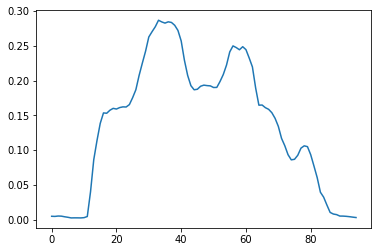

In [ ]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

### Autocorrelation for pitch(F0) measurement

Correlation은 두 변수 간의 선형적 관계 측정하고자 할 때 사용하지만, autocorrelation은 자기 자신 (auto)과 correlation을 알아보고자 할 때 사용한다. 

(시계열 분석으로 도출된 잔차가 시간의 흐름에 따라 상관성이 존재하는지 확인하는 함수)

-> 현재의 상태가 과거, 미래와 밀접한 관련이 있을 때 이를 "자기상관관계"라고 부름 (시간의 흐름에 따라 독립적이지 않다) ex) 주식의 가격이 어제의 가격에 영향을 받고, 내일의 가격에 영향을 주는 것

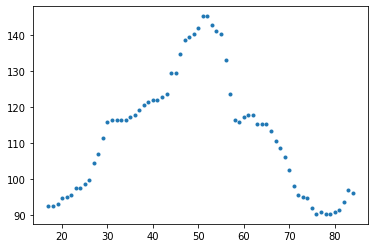

In [ ]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')